## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [4]:
app_train['cut_AMT_ANNUITY'] = pd.cut(app_train['AMT_ANNUITY'], 10)

In [5]:
app_train['cut_AMT_ANNUITY'].value_counts()

(1359.09, 27256.5]      178956
(27256.5, 52897.5]      112452
(52897.5, 78538.5]       14399
(78538.5, 104179.5]       1268
(104179.5, 129820.5]       302
(129820.5, 155461.5]        61
(206743.5, 232384.5]        33
(155461.5, 181102.5]        22
(181102.5, 206743.5]         5
(232384.5, 258025.5]         1
Name: cut_AMT_ANNUITY, dtype: int64

In [6]:
app_train['qcut_AMT_ANNUITY'] = pd.qcut(app_train['AMT_ANNUITY'], 10)
app_train['qcut_AMT_ANNUITY'].value_counts()

(1615.499, 11074.5]    30880
(37516.5, 45954.0]     30808
(24903.0, 28062.0]     30790
(21865.5, 24903.0]     30772
(14701.5, 18189.0]     30763
(32004.0, 37516.5]     30762
(18189.0, 21865.5]     30731
(28062.0, 32004.0]     30690
(45954.0, 258025.5]    30676
(11074.5, 14701.5]     30627
Name: qcut_AMT_ANNUITY, dtype: int64

In [8]:
import seaborn as sns # 另一個繪圖-樣式套件

In [13]:
app_train['cut_AMT_ANNUITY'].value_counts().keys().sort_values()

CategoricalIndex([  (1359.09, 27256.5],   (27256.5, 52897.5],
                    (52897.5, 78538.5],  (78538.5, 104179.5],
                  (104179.5, 129820.5], (129820.5, 155461.5],
                  (155461.5, 181102.5], (181102.5, 206743.5],
                  (206743.5, 232384.5], (232384.5, 258025.5]],
                 categories=[(1359.09, 27256.5], (27256.5, 52897.5], (52897.5, 78538.5], (78538.5, 104179.5], (104179.5, 129820.5], (129820.5, 155461.5], (155461.5, 181102.5], (181102.5, 206743.5], ...], ordered=True, dtype='category')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\An

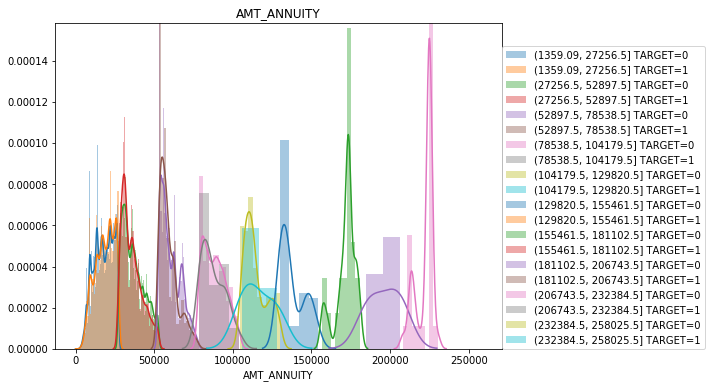

In [17]:
group = app_train['cut_AMT_ANNUITY'].value_counts().keys().sort_values()

plt.figure(figsize=(8,6))
for i in range(len(group)):
    sns.distplot(app_train.loc[(app_train['cut_AMT_ANNUITY'] == group[i]) & \
                              (app_train['TARGET'] == 0), 'AMT_ANNUITY'], label = str(group[i])+' TARGET=0')
    
    sns.distplot(app_train.loc[(app_train['cut_AMT_ANNUITY'] == group[i]) & \
                              (app_train['TARGET'] == 1), 'AMT_ANNUITY'], label = str(group[i])+' TARGET=1')
plt.title('AMT_ANNUITY')
plt.legend(loc= (1,0))
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


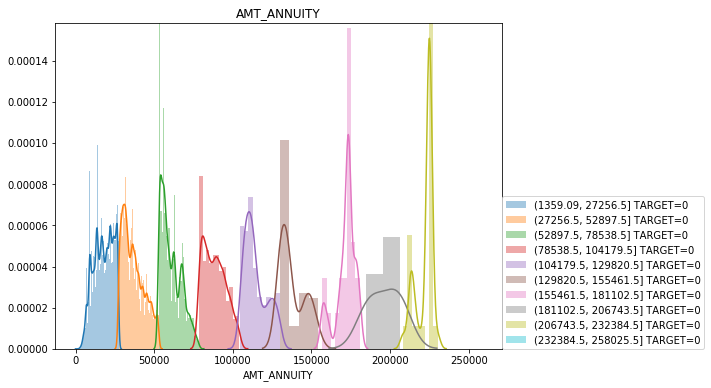

In [22]:
plt.figure(figsize=(8,6))
for i in range(len(group)):
    sns.distplot(app_train.loc[(app_train['cut_AMT_ANNUITY'] == group[i]) & \
                              (app_train['TARGET'] == 0), 'AMT_ANNUITY'], label = str(group[i])+' TARGET=0')
     
plt.title('AMT_ANNUITY')
plt.legend(loc= (1,0))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\An

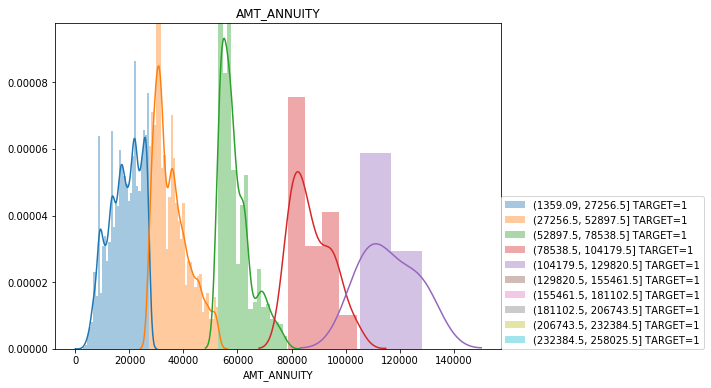

In [23]:
plt.figure(figsize=(8,6))
for i in range(len(group)):
    sns.distplot(app_train.loc[(app_train['cut_AMT_ANNUITY'] == group[i]) & \
                              (app_train['TARGET'] == 1), 'AMT_ANNUITY'], label = str(group[i])+' TARGET=1')
     
plt.title('AMT_ANNUITY')
plt.legend(loc= (1,0))
plt.show()